**IMPORTS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**DATA INPUTING, INTERPRETATION AND PROCESSING**

In [2]:
df = pd.read_csv('superstore.csv', encoding='latin-1')

In [3]:
df.head()

,Ship Mode,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days,order year,order month
0,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221,2,0.0,62,40,High,2,2014,11
1,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709,9,0.1,-288,923,Critical,2,2014,2
2,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175,9,0.1,919,915,Medium,1,2014,10
3,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892,5,0.1,-96,910,Medium,2,2014,1
4,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832,8,0.0,311,903,Critical,1,2014,11


In [4]:
df.shape

(51290, 19)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Region', 'Market',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Delivery Days', 'order year', 'order month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   City            51290 non-null  object 
 3   State           51290 non-null  object 
 4   Country         51290 non-null  object 
 5   Region          51290 non-null  object 
 6   Market          51290 non-null  object 
 7   Category        51290 non-null  object 
 8   Sub-Category    51290 non-null  object 
 9   Product Name    51290 non-null  object 
 10  Sales           51290 non-null  int64  
 11  Quantity        51290 non-null  int64  
 12  Discount        51290 non-null  float64
 13  Profit          51290 non-null  int64  
 14  Shipping Cost   51290 non-null  int64  
 15  Order Priority  51290 non-null  object 
 16  Delivery Days   51290 non-null  int64  
 17  order year      51290 non-null 

In [7]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print("-"*50)

Ship Mode
['First Class' 'Second Class' 'Same Day' 'Standard Class']
--------------------------------------------------
Segment
['Consumer' 'Corporate' 'Home Office']
--------------------------------------------------
City
['Oklahoma City' 'Wollongong' 'Brisbane' ... 'San Mateo' 'Portage'
 'Victoria Falls']
--------------------------------------------------
State
['Oklahoma' 'New South Wales' 'Queensland' ... 'Bitola' 'Edirne'
 'Matabeleland North']
--------------------------------------------------
Country
['United States' 'Australia' 'Germany' 'Senegal' 'New Zealand'
 'Afghanistan' 'Saudi Arabia' 'Brazil' 'China' 'France' 'Italy' 'Tanzania'
 'Poland' 'United Kingdom' 'Mexico' 'El Salvador' 'Taiwan' 'India'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Indonesia'
 'Uruguay' 'Iran' 'Mozambique' 'Bangladesh' 'Spain' 'Ukraine' 'Nicaragua'
 'Morocco' 'Philippines' 'Austria' 'Colombia' 'Netherlands' 'Malaysia'
 'Ecuador' 'Thailand' 'Somalia' 'Guatemala' 'Belarus' 'Cambodia'
 'S

In [8]:
for col in df.describe().columns:
  print(col)
  print(df[col].unique())
  print("-"*50)

Sales
[ 221 3709 5175 ... 1875 2793 2934]
--------------------------------------------------
Quantity
[ 2  9  5  8  4  6  1  3  7 12 14 10 13 11]
--------------------------------------------------
Discount
[0.    0.1   0.2   0.15  0.17  0.5   0.47  0.4   0.7   0.25  0.002 0.07
 0.27  0.3   0.35  0.6   0.65  0.8   0.57  0.37  0.402 0.55  0.202 0.32
 0.45  0.602 0.85 ]
--------------------------------------------------
Profit
[   62  -288   919 ...   942   792 -1850]
--------------------------------------------------
Shipping Cost
[ 40 923 915 910 903 897 894 878  25  11   4 835 832 810 804 801   1 778
 766 763 759 752 730 728 725  55 704 699  45 689  26 678   8 668 665 660
 658 656 655   5 652 644 637 634   2 630 627 625 616 614 609 604 600 595
 160 593 592 590 589 588 586 585 581 103 580 576 573 572 568  43  23 564
 562 556 555 553 550 548  12 546 545 541 540 539 533 531 530 527 523 522
 520   3 516 515 511 510 506 504 499 524  82 498  47  13 493 492 491   7
 487   6 483 481 479 475 47

**Variation in sales over the period of 3 years suggests that the sales have been increase over the period especially in the third year but have also seen occasional downs.**

---



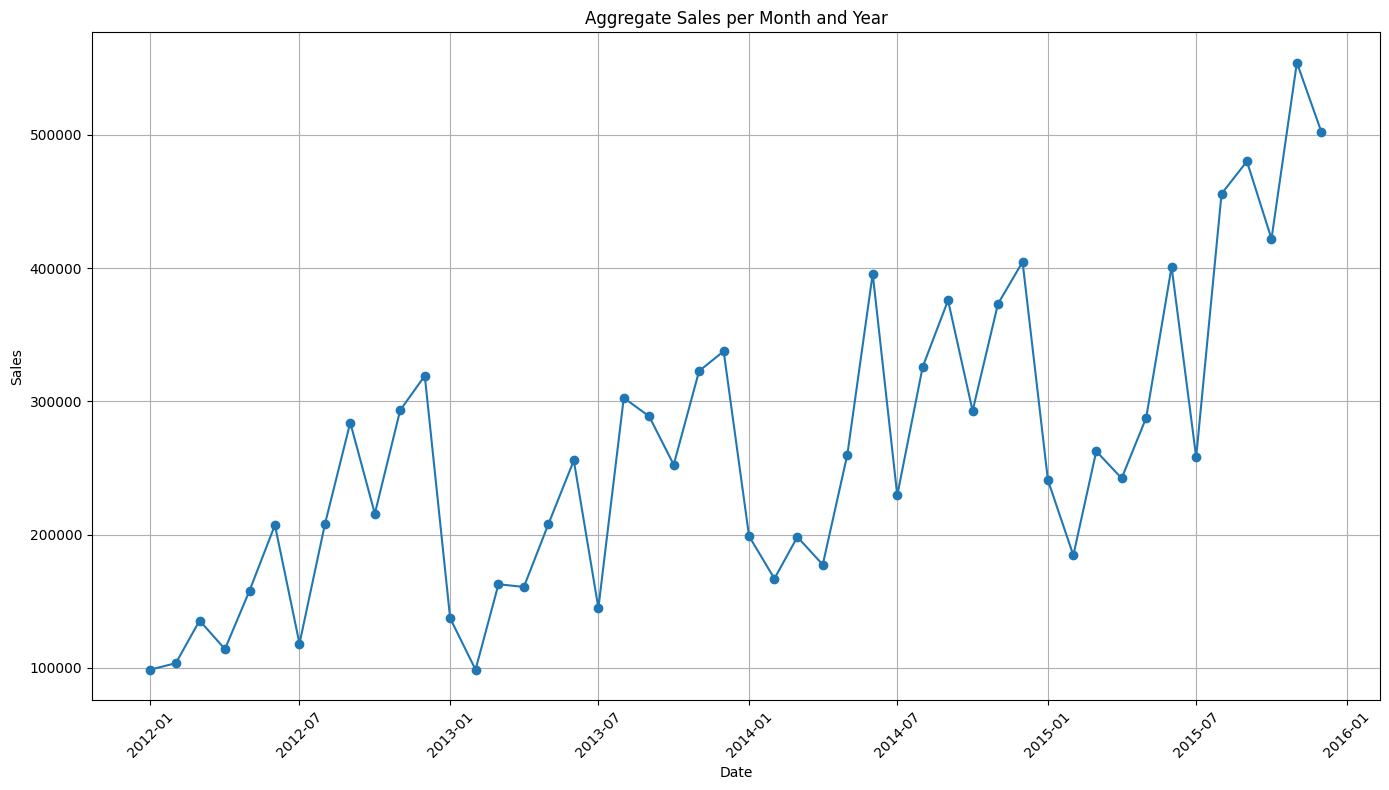

In [9]:
df['year_month'] = df['order year'].astype(str) + '-' + df['order month'].astype(str).str.zfill(2)

# Aggregate sales per year and month
sales_per_month = df.groupby('year_month')['Sales'].sum().reset_index()

# Convert 'year_month' to datetime for proper plotting
sales_per_month['year_month'] = pd.to_datetime(sales_per_month['year_month'], format='%Y-%m')

# Sort by 'year_month'
sales_per_month = sales_per_month.sort_values('year_month')

# Plot the aggregate sales per month and year
plt.figure(figsize=(14, 8))
plt.plot(sales_per_month['year_month'], sales_per_month['Sales'], marker='o')
plt.title('Aggregate Sales per Month and Year')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**With increase in the sales there is a complimenting increase in the profits also as per the intutions**

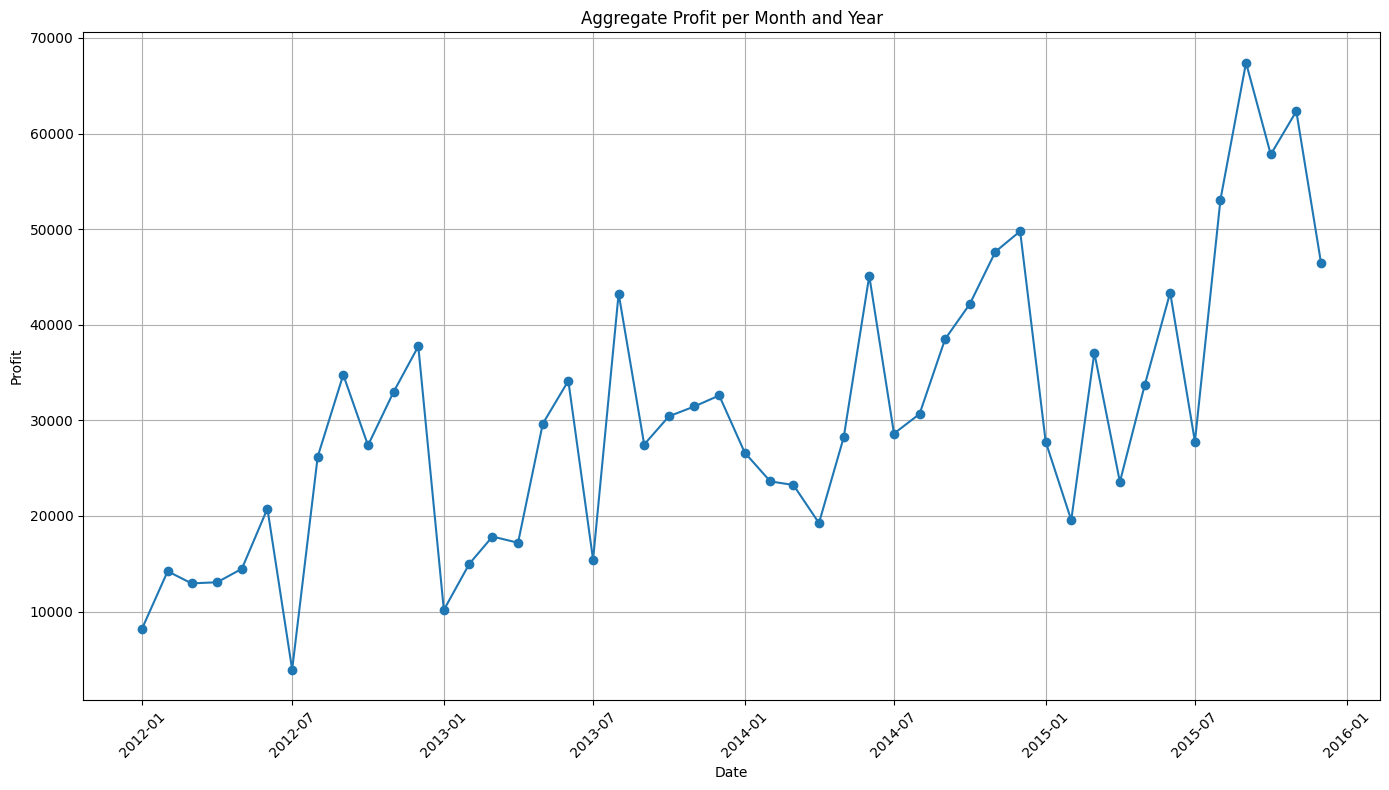

In [10]:
df['year_month'] = df['order year'].astype(str) + '-' + df['order month'].astype(str).str.zfill(2)

# Aggregate Profit per year and month
Profit_per_month = df.groupby('year_month')['Profit'].sum().reset_index()

# Convert 'year_month' to datetime for proper plotting
Profit_per_month['year_month'] = pd.to_datetime(Profit_per_month['year_month'], format='%Y-%m')

# Sort by 'year_month'
Profit_per_month = Profit_per_month.sort_values('year_month')

# Plot the aggregate Profit per month and year
plt.figure(figsize=(14, 8))
plt.plot(Profit_per_month['year_month'], Profit_per_month['Profit'], marker='o')
plt.title('Aggregate Profit per Month and Year')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**We can see that all the category products have almost equal and healthy sales with technologty sales being the best and office supplies towards a lower side**

In [11]:
import plotly.graph_objs as go

sales_per_category = df.groupby('Category')['Sales'].sum()

# Create data for Plotly pie chart
labels = sales_per_category.index
values = sales_per_category.values

# Plotly pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=0.3)])

fig.update_layout(title='Sales per Category',
                  title_x=0.5,  # Center the title
                  annotations=[dict(text='Total Sales', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


***Here's the catch. Furniture category even after having 1/3rd of the total sales still produces just ~20% of the overall profit and office supplies being less in sales still produce significantly higher profits than furniture with technology contributing the most in sales as well as the profits.***
***To be exact furniture has just 6% of average profit for sales compared to ~13.5-14% for office supplies and techlogy respectively***

In [12]:
import plotly.graph_objs as go

Profit_per_category = df.groupby('Category')['Profit'].sum()

# Create data for Plotly pie chart
labels = Profit_per_category.index
values = Profit_per_category.values

# Plotly pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=0.3)])

fig.update_layout(title='Profit per Category',
                  title_x=0.5,  # Center the title
                  annotations=[dict(text='Total Profit', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


Profit-to-Sales Ratio per Category:
                 Profit_Sales_Ratio
Category                           
Furniture                  6.900777
Office Supplies           13.529937
Technology                13.948859


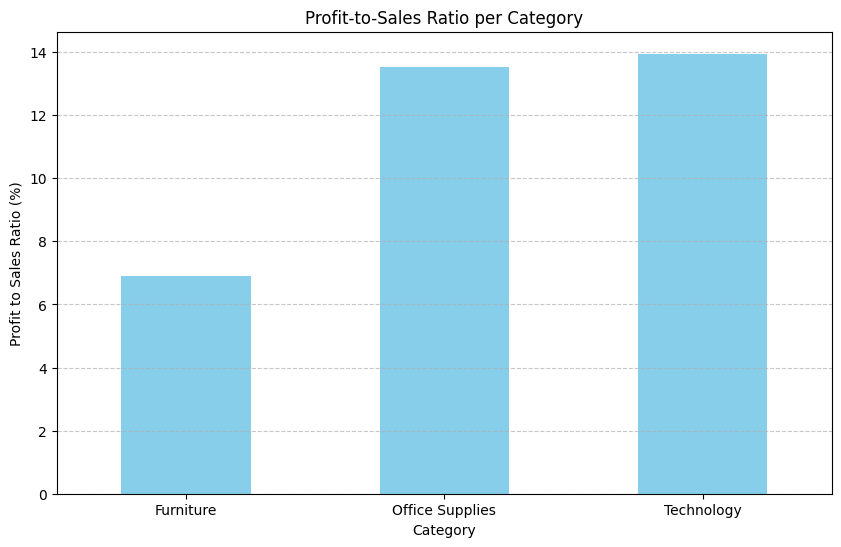

In [31]:
sales_profit_per_category = df.groupby('Category')[['Sales', 'Profit']].sum()

# Calculate profit-to-sales ratio
sales_profit_per_category['Profit_Sales_Ratio'] = (sales_profit_per_category['Profit'] * 100) / sales_profit_per_category['Sales']

# Display the result
print("Profit-to-Sales Ratio per Category:")
print(sales_profit_per_category[['Profit_Sales_Ratio']])

# Create a bar chart
plt.figure(figsize=(10, 6))
sales_profit_per_category['Profit_Sales_Ratio'].plot(kind='bar', color='skyblue')
plt.title('Profit-to-Sales Ratio per Category')
plt.xlabel('Category')
plt.ylabel('Profit to Sales Ratio (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**We can see that shipping costs for furnitures is significantly higher which may be a reason but technology also have even sligthly shipping costs still they contribute most to the profits**

In [23]:
avg_shipping_per_day = df.groupby('Category')['Shipping Cost'].mean().reset_index()

# Create Plotly scatter plot
fig = go.Figure(data=go.Scatter(x=avg_shipping_per_day['Category'],
                                y=avg_shipping_per_day['Shipping Cost'],
                                mode='markers',
                                marker=dict(size=10, color='rgb(55, 83, 109)', opacity=0.8),
                                text='Average Shipping Cost'))

# Customize layout
fig.update_layout(title='Average Shipping Cost per Category',
                  xaxis_title='Category',
                  yaxis_title='Average Shipping Cost',
                  hovermode='closest')

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


***Average Discounts for the furniture is higher than that for other categories. This can be a majro factor for lower profits from furnitures***

In [18]:
df['Discount_Percentage'] = (df['Discount'] / df['Quantity']) * 100

# Aggregate average discount percentage per category
avg_discount_per_category = df.groupby('Category')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=avg_discount_per_category['Category'],
                            y=avg_discount_per_category['Discount_Percentage'],
                            marker_color='rgb(55, 83, 109)',
                            text=avg_discount_per_category['Discount_Percentage'].round(2),
                            textposition='outside'))

# Customize layout
fig.update_layout(title='Average Discount Percentage per Category',
                  xaxis_title='Category',
                  yaxis_title='Average Discount Percentage (%)',
                  bargap=0.2,  # Gap between bars of adjacent location coordinates
                  bargroupgap=0.1  # Gap between bars of the same location coordinates
                  )

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


***We find that it is the tables in the furniture category which has almost 12% avg discounts per quantity sold compared to around an average of 6.5% for rest all the products which is significantly harming the profits that could be made from furnitures***

In [25]:
df['Discount_Percentage'] = (df['Discount'] / df['Quantity']) * 100

# Aggregate average discount percentage per Sub Category
avg_discount_per_Sub_Category = df.groupby('Sub-Category')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=avg_discount_per_Sub_Category['Sub-Category'],
                            y=avg_discount_per_Sub_Category['Discount_Percentage'],
                            marker_color='rgb(55, 83, 109)',
                            text=avg_discount_per_Sub_Category['Discount_Percentage'].round(2),
                            textposition='outside'))

# Customize layout
fig.update_layout(title='Average Discount Percentage per Sub-Category',
                  xaxis_title='Sub-Category',
                  yaxis_title='Average Discount Percentage (%)',
                  bargap=0.2,  # Gap between bars of adjacent location coordinates
                  bargroupgap=0.1  # Gap between bars of the same location coordinates
                  )

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()

In [26]:
import plotly.express as px

furniture_df = df[df['Category'] == 'Furniture']

# Calculate average discount percentage for each sub-category
furniture_df['Discount_Percentage'] = (furniture_df['Discount'] / furniture_df['Quantity']) * 100
avg_discount_per_subcategory = furniture_df.groupby('Sub-Category')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = px.bar(avg_discount_per_subcategory,
             x='Sub-Category',
             y='Discount_Percentage',
             title='Average Discount Percentage for Each Sub-Category under Furniture Category',
             labels={'Sub-Category': 'Sub-Category', 'Discount_Percentage': 'Average Discount Percentage (%)'},
             color='Discount_Percentage',
             color_continuous_scale=px.colors.sequential.Blues)

# Customize layout
fig.update_layout(xaxis_tickangle=-45)

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()



***And now average profit percent to sales ratio for each sub category of furnitures proves that it is only the tables that are make as high as 8% in losses where as rest all are making more than 9% in average profit per sales***

Profit-to-Sales Ratio per Category:
              Profit_Sales_Ratio
Sub-Category                    
Bookcases              11.016012
Chairs                  9.319924
Furnishings            12.016926
Tables                 -8.458539


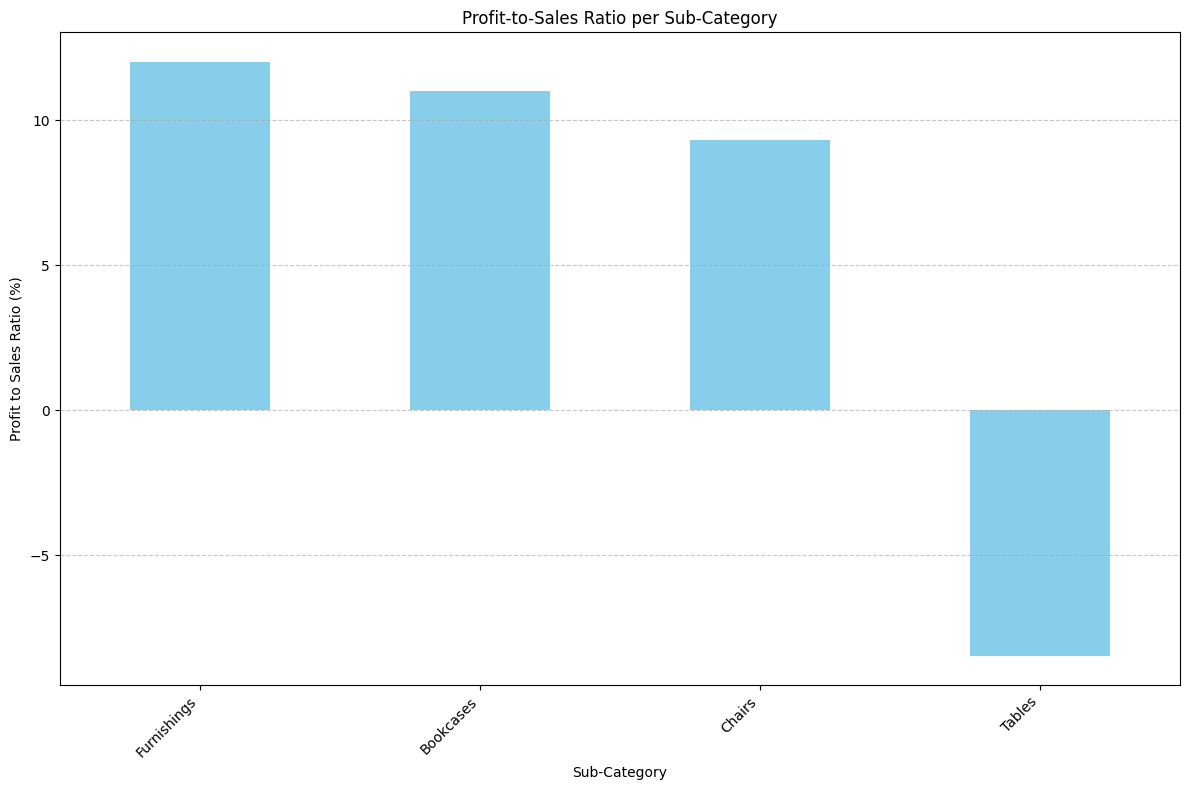

In [33]:
sales_profit_per_sub_category = furniture_df.groupby('Sub-Category')[['Sales', 'Profit']].sum()

# Calculate profit-to-sales ratio
sales_profit_per_sub_category['Profit_Sales_Ratio'] = sales_profit_per_sub_category['Profit']*100 / sales_profit_per_sub_category['Sales']

# Display the result
print("Profit-to-Sales Ratio per Category:")
print(sales_profit_per_sub_category[['Profit_Sales_Ratio']])

plt.figure(figsize=(12, 8))
sales_profit_per_sub_category['Profit_Sales_Ratio'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Profit-to-Sales Ratio per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit to Sales Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



***Also the shipping costs for the tables is also the most for any furniture sub category contrubuting to added costs to be beared***

In [28]:
avg_shipping_per_sub = furniture_df.groupby('Sub-Category')['Shipping Cost'].mean().reset_index()

# Create Plotly scatter plot
fig = go.Figure(data=go.Scatter(x=avg_shipping_per_sub['Sub-Category'],
                                y=avg_shipping_per_sub['Shipping Cost'],
                                mode='markers',
                                marker=dict(size=10, color='rgb(55, 83, 109)', opacity=0.8),
                                text='Average Shipping Cost'))

# Customize layout
fig.update_layout(title='Average Shipping Cost per Sub-Category(Furniture)',
                  xaxis_title='Sub-Category(Furniture)',
                  yaxis_title='Average Shipping Cost',
                  hovermode='closest')

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


***From below graphs we can see that the sales in the African region is significantly lower than the rest of the regions whereas Asia-pacific is the biggest market with maximum sales. Also, European market is the highest profit generating market over the sales***

In [14]:
sales_profit_per_market = df.groupby('Market')[['Sales', 'Profit']].sum().reset_index()

# Plotly grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='Sales', x=sales_profit_per_market['Market'], y=sales_profit_per_market['Sales']),
    go.Bar(name='Profit', x=sales_profit_per_market['Market'], y=sales_profit_per_market['Profit'])
])

# Update layout
fig.update_layout(barmode='group', title='Sales and Profit per Market',
                  xaxis_title='Market', yaxis_title='Amount', legend_title='Metrics')

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


**Profits per sales is leaast in Asia Pacific and LATAM Markets**

In [15]:
sales_profit_per_market = df.groupby('Market')[['Sales', 'Profit']].sum()

# Calculate profit-to-sales ratio (in percentage)
sales_profit_per_market['Profit_Sales_Ratio'] = (sales_profit_per_market['Profit'] / sales_profit_per_market['Sales']) * 100

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=sales_profit_per_market.index, y=sales_profit_per_market['Profit_Sales_Ratio']))

# Customize layout
fig.update_layout(title='Profit-to-Sales Ratio per Market',
                  xaxis_title='Market',
                  yaxis_title='Profit-to-Sales Ratio (%)')

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


**Even after 11% discounts the sales in Africa is very less. Also the discounts in Asia-Pacific in also around 9% but given the sales in this area it can be justified. This also somehow manages to explain different cultures in different regions of the world where the market in Asia-Pacific is largely sensetive to price, Africa is still not much developed and conomically stable and the culture in Europe where discounts is not a general fashion and markter is quality driven**

In [19]:
df['Discount_Percentage'] = (df['Discount']*100 / df['Quantity'])

# Aggregate average discount percentage per Market
avg_discount_per_Market = df.groupby('Market')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=avg_discount_per_Market['Market'],
                            y=avg_discount_per_Market['Discount_Percentage'],
                            marker_color='rgb(55, 83, 109)',
                            text=avg_discount_per_Market['Discount_Percentage'].round(2),
                            textposition='outside'))

# Customize layout
fig.update_layout(title='Average Discount Percentage per Market',
                  xaxis_title='Market',
                  yaxis_title='Average Discount Percentage (%)',
                  bargap=0.2,  # Gap between bars of adjacent location coordinates
                  bargroupgap=0.1  # Gap between bars of the same location coordinates
                  )

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


***Now the shipping costs doesn't justify the high discounts in the Asia Pacific region where the shipping costs are maximum. And with around 9% additional discount is makes the Asia-Pacific the least profitable region and it can be increased by lowering the discounts and considering the sales even small changes in discounts might bring about larger savings of profits from this region. But this might get fired back too making to loose sales and a big market like Asia-Pacific so any decision should be taken wisely***

In [24]:
avg_shipping_per_day = df.groupby('Market')['Shipping Cost'].mean().reset_index()

# Create Plotly scatter plot
fig = go.Figure(data=go.Scatter(x=avg_shipping_per_day['Market'],
                                y=avg_shipping_per_day['Shipping Cost'],
                                mode='markers',
                                marker=dict(size=10, color='rgb(55, 83, 109)', opacity=0.8),
                                text='Average Shipping Cost'))

# Customize layout
fig.update_layout(title='Average Shipping Cost per Market',
                  xaxis_title='Market',
                  yaxis_title='Average Shipping Cost',
                  hovermode='closest')

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


In [40]:
asia_pacific_df = df[df['Market'] == 'Asia Pacific']

# Display the first few rows of the filtered dataset to ensure the filtering is correct
print("Asia Pacific Region Data:\n", asia_pacific_df.head())

# Extract unique values in the 'Country' column for the Asia Pacific region
unique_countries = asia_pacific_df['Region'].unique()
print(unique_countries)

Asia Pacific Region Data:
         Ship Mode    Segment        City            State      Country  \
1    Second Class  Corporate  Wollongong  New South Wales    Australia   
2     First Class   Consumer    Brisbane       Queensland    Australia   
5    Second Class  Corporate      Sydney  New South Wales    Australia   
6     First Class   Consumer     Porirua       Wellington  New Zealand   
7  Standard Class   Consumer    Hamilton          Waikato  New Zealand   

    Region        Market    Category Sub-Category  \
1  Oceania  Asia Pacific   Furniture       Chairs   
2  Oceania  Asia Pacific  Technology       Phones   
5  Oceania  Asia Pacific  Technology       Phones   
6  Oceania  Asia Pacific   Furniture       Chairs   
7  Oceania  Asia Pacific   Furniture       Tables   

                                     Product Name  ...  Quantity  Discount  \
1       Novimex Executive Leather Armchair, Black  ...         9       0.1   
2               Nokia Smart Phone, with Caller ID  ..

**Now we compare the financials based on the order priority where we can see that the most profit ~60% profit comes from medium orderpriority level and ~30% from the High order priority level**

In [16]:
import plotly.graph_objs as go

Profit_per_Order_Priority = df.groupby('Order Priority')['Profit'].sum()

# Create data for Plotly pie chart
labels = Profit_per_Order_Priority.index
values = Profit_per_Order_Priority.values

# Plotly pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', hole=0.3)])

fig.update_layout(title='Profit per Order Priority',
                  title_x=0.5,  # Center the title
                  annotations=[dict(text='Total Profit', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


***Profit to sales and quantity in each order priority level is almost comparable with slighly more in critical order level which is the ideal case and maybe can be a little more***

In [17]:
sales_profit_per_order_priority = df.groupby('Order Priority')[['Sales', 'Profit']].sum()

# Calculate profit-to-sales ratio (in percentage)
sales_profit_per_order_priority['Profit_Sales_Ratio'] = (sales_profit_per_order_priority['Profit'] / sales_profit_per_order_priority['Sales']) * 100

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=sales_profit_per_order_priority.index, y=sales_profit_per_order_priority['Profit_Sales_Ratio']))

# Customize layout
fig.update_layout(title='Profit-to-Sales Ratio per Order Priority',
                  xaxis_title='Order Priority',
                  yaxis_title='Profit-to-Sales Ratio (%)')

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


In [32]:
quantity_profit_per_order_priority = df.groupby('Order Priority')[['Quantity', 'Profit']].sum()

# Calculate profit-to-sales ratio (in percentage)
quantity_profit_per_order_priority['Profit_Quantity_Ratio'] = (quantity_profit_per_order_priority['Profit'] / quantity_profit_per_order_priority['Quantity']) * 100

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=quantity_profit_per_order_priority.index, y=quantity_profit_per_order_priority['Profit_Quantity_Ratio']))

# Customize layout
fig.update_layout(title='Profit to Quantity Ratio per Order Priority',
                  xaxis_title='Order Priority',
                  yaxis_title='Profit to Quantity Ratio (%)')

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


***We see a lot of discount(almost as much as in medium and low order priority) has been given in the critical ad high order priority and also the shipping cost is the most in these 2 categories only especially in critical order priority which can be decreased to save a significant amount of profits from getting lost as they together contribute to around 37% of total sales***

In [20]:
df['Discount_Percentage'] = (df['Discount'] / df['Quantity']) * 100

# Aggregate average discount percentage per Order_priority
avg_discount_per_Order_priority = df.groupby('Order Priority')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=avg_discount_per_Order_priority['Order Priority'],
                            y=avg_discount_per_Order_priority['Discount_Percentage'],
                            marker_color='rgb(55, 83, 109)',
                            text=avg_discount_per_Order_priority['Discount_Percentage'].round(2),
                            textposition='outside'))

# Customize layout
fig.update_layout(title='Average Discount Percentage per Order Priority',
                  xaxis_title='Order Priority',
                  yaxis_title='Average Discount Percentage (%)',
                  bargap=0.2,  # Gap between bars of adjacent location coordinates
                  bargroupgap=0.1  # Gap between bars of the same location coordinates
                  )

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


In [22]:
avg_shipping_per_day = df.groupby('Order Priority')['Shipping Cost'].mean().reset_index()

# Create Plotly scatter plot
fig = go.Figure(data=go.Scatter(x=avg_shipping_per_day['Order Priority'],
                                y=avg_shipping_per_day['Shipping Cost'],
                                mode='markers',
                                marker=dict(size=10, color='rgb(55, 83, 109)', opacity=0.8),
                                text='Average Shipping Cost'))

# Customize layout
fig.update_layout(title='Average Shipping Cost per Order Priority',
                  xaxis_title='Order Priority',
                  yaxis_title='Average Shipping Cost',
                  hovermode='closest')

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


In [21]:
avg_shipping_per_day = df.groupby('Delivery Days')['Shipping Cost'].mean().reset_index()

# Create Plotly scatter plot
fig = go.Figure(data=go.Scatter(x=avg_shipping_per_day['Delivery Days'],
                                y=avg_shipping_per_day['Shipping Cost'],
                                mode='markers',
                                marker=dict(size=10, color='rgb(55, 83, 109)', opacity=0.8),
                                text='Average Shipping Cost'))

# Customize layout
fig.update_layout(title='Average Shipping Cost per Delivery Day',
                  xaxis_title='Delivery Days',
                  yaxis_title='Average Shipping Cost',
                  hovermode='closest')

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


In [41]:
sales_profit_per_segment = df.groupby('Segment')[['Sales', 'Profit']].sum()

# Calculate profit-to-sales ratio (in percentage)
sales_profit_per_segment['Profit_Sales_Ratio'] = (sales_profit_per_segment['Profit'] / sales_profit_per_segment['Sales']) * 100

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=sales_profit_per_segment.index, y=sales_profit_per_segment['Profit_Sales_Ratio']))

# Customize layout
fig.update_layout(title='Profit-to-Sales Ratio per Segment',
                  xaxis_title='Segment',
                  yaxis_title='Profit-to-Sales Ratio (%)')

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()


In [42]:
df['Discount_Percentage'] = (df['Discount'] / df['Quantity']) * 100

# Aggregate average discount percentage per Order_priority
avg_discount_per_Segment = df.groupby('Segment')['Discount_Percentage'].mean().reset_index()

# Create Plotly bar chart
fig = go.Figure(data=go.Bar(x=avg_discount_per_Segment['Segment'],
                            y=avg_discount_per_Segment['Discount_Percentage'],
                            marker_color='rgb(55, 83, 109)',
                            text=avg_discount_per_Segment['Discount_Percentage'].round(2),
                            textposition='outside'))

# Customize layout
fig.update_layout(title='Average Discount Percentage per Segment',
                  xaxis_title='Segment',
                  yaxis_title='Average Discount Percentage (%)',
                  bargap=0.2,  # Gap between bars of adjacent location coordinates
                  bargroupgap=0.1  # Gap between bars of the same location coordinates
                  )

# Show plot in notebook (Jupyter/Colab) or save as HTML for standalone view
fig.show()